# Introduction to Neural Networks with Cogito
## 1 Single Neuron

This course will teach you a about how we can create neural networks and use them to solve hard problems. A neural network solves problems by simulating how the brain works. We will start of with some basics about a single neuron!

### 1.1 Neurons

A Neuron is an electrically excitable cell that receives, processes, and transmits information through electrical and chemical signals. These signals between neurons occur via specialized connections called synapses. Neurons can connect to each other to form neural pathways, and neural circuits. Neurons are the primary components of the central nervous system, which includes the brain and spinal cord, and of the peripheral nervous system. 

![](Images/neuron.png "neuron")

A typical neuron consists of a cell body (soma), dendrites, and an axon. Axons connect to dendrites via synapses.
When a neuron recieves an electro-chemical signal the signal is propagated from the dendritic input, through the cell body, and down the axon to other neurons.

A neuron only fires if its input signal exceeds a certain amount (the threshold) in a short time period.

Synapses vary in strength:
* Good connections allowing a large signal
* Slight connections allow only a weak signal
* Synapses can either be an ampifier or an inhibitory

### 1.2 Perceptron

Now that we know a few things about a neuron, let's create a simple model of a single neuron! This is called a perceptron.

![Perceptron](Images/Perceptron.png "perceptron")

The perceptron has inputs, weights, an activation and an output. To calculate the perceptron's output we compute a weighted sum of the input signal and compare it to some treshold $\theta$ ("theta"). If the input is smaller than the treshold $\theta$, the output is -1, otherwise the output is 1.

$$ X = \sum_{i=1}^{n} x_iw_i $$

$$
Y =
\begin{cases}
+1 & \text{if } X >= \theta \\
-1 & \text{if } X < \theta \\
\end{cases}
$$

This type of activation function is called the sign function and is one of many activation functions we can use. The total output of our neuron/perceptron becomes:

$$ Y = sign[\sum_{i=1}^{n} x_iw_i - \theta] $$

The activation function is there to simulate the firing (activation) of the neuron when the total input to the neuron is great enough. If the neuron got enough input, we say it got activated. The actual activation of the neuron varies depending on the type of activation function we use.

### 1.3 Activation
In a neural network, we can use many different activation functions. A few choices are the step function, sigmoid and a linear function:

$$ Y_{step} = \begin{cases}
1 & \text{if } X >= 0 \\
0 & \text{if } X < 0 \\
\end{cases} $$

$$ Y_{sigmoid} = \frac{1}{1+e^{-x}} $$

$$ Y_{linear} = x $$

Let's implement some activation functions in Python!

In [1]:
import math
import random
import matplotlib.pyplot as plt
%matplotlib inline

# Click inside this block and press Ctrl+Enter to run (or use the Run button in the toolbar)
print("All good!")
# If everything went well, you should see the text All good! below:

All good!


First, let's implement the step function:

$$ Y_{step} = \begin{cases}
1 & \text{if } X >= 0 \\
0 & \text{if } X < 0 \\
\end{cases} $$

![](Images/stepfunction.svg)

In [2]:
# Implement the step activation function (≈ 1 line)
def step(z):
    ### CODE START HERE
    a = 1 if z >= 0 else 0
    ### CODE END HERE
    return a

In [3]:
print("step(-6):", step(-6))
print("step(0):", step(0))
print("step(18):", step(18))

step(-6): 0
step(0): 1
step(18): 1


**Expected Output**: 

<table>
  <tr>
    <td> step(-6) </td>
    <td> 0 </td> 
  </tr>
  <tr>
    <td> step(0) </td>
    <td> 1 </td> 
  </tr>
  <tr>
    <td> step(18) </td>
    <td> 1 </td> 
  </tr>
</table>

The sign function is almost the same as the step function, try that one too:

$$ Y_{sign} = \begin{cases}
1 & \text{if } X >= 0 \\
-1 & \text{if } X < 0 \\
\end{cases} $$

In [4]:
# Implement the sign activation function (≈ 1 line)
def sign(z):
    ### CODE START HERE
    a = 1 if z >= 0 else -1
    ### CODE END HERE
    return a

In [5]:
print("sign(-6):", sign(-6))
print("sign(0):", sign(0))
print("sign(18):", sign(18))

sign(-6): -1
sign(0): 1
sign(18): 1


**Expected Output**: 

<table>
  <tr>
    <td> sign(-6) </td>
    <td> -1 </td> 
  </tr>
  <tr>
    <td> sign(0) </td>
    <td> 1 </td> 
  </tr>
  <tr>
    <td> sign(18) </td>
    <td> 1 </td> 
  </tr>
</table>

Next let's implement sigmoid. Sigmoid is one of the most used activation functions in neural networks.

$$ Y_{sigmoid} = \frac{1}{1+e^{-z}} $$

![](Images/sigmoid.png)

(Hint: The math library has a useful function `exp(x)` = $ e^x $)

In [6]:
# Implement the sigmoid activation function (≈ 1 line)
def sigmoid(z):
    return 1/(1+math.exp(-z))

In [7]:
print("sigmoid(-2):", sigmoid(-2))
print("sigmoid(0):", sigmoid(0))
print("sigmoid(3):", sigmoid(3))

sigmoid(-2): 0.11920292202211755
sigmoid(0): 0.5
sigmoid(3): 0.9525741268224334


**Expected Output**: 

<table>
  <tr>
    <td> sigmoid(-2) </td>
    <td> 0.11920292202211755 </td> 
  </tr>
  <tr>
    <td> sigmoid(0) </td>
    <td> 0.5 </td> 
  </tr>
  <tr>
    <td> sigmoid(3) </td>
    <td> 0.9525741268224334 </td> 
  </tr>
</table>

### 1.4 Weights
When we create our neuron, we need some initial values for the weights (w in perceptron image above). They decide how much the neuron will "listen" to signals from the different input nodes. We usually want to initialize these with a random value in $[-0.5, 0.5]$. We usually represent this as a vector:

$$ \boldsymbol w = \begin{bmatrix} random.uniform(-0.5, 0.5) \\ random.uniform(-0.5, 0.5) \end{bmatrix} $$

In [8]:
# Implement initialize weights where n is 
# the number of different weights (≈ 1 line)
def init_weights(n):
    ### CODE START HERE
    w = [random.uniform(-0.5, 0.5) for _ in range(n)]
    ### CODE END HERE
    return w

In [9]:
print("len(init_weights(5)):", len(init_weights(5)))
w = init_weights(1000000)
mu = sum(w)/1000000
print("expected value:", mu, "\nis normal:", str(-0.005 < mu or mu > 0.005))
print("within value range:", str(min(w) > -0.5 and max(w) < 0.5))

len(init_weights(5)): 5
expected value: -0.0004943049416031311 
is normal: True
within value range: True


**Expected Output**: 

<table>
  <tr>
    <td> len(init_weights(5) </td>
    <td> 5 </td> 
  </tr>
  <tr>
    <td> is normal </td>
    <td> True </td> 
  </tr>
  <tr>
    <td> within value range </td>
    <td> True </td> 
  </tr>
</table>

### 1.5 Output

Now it's time to get some output from our neuron. Remember our equations from earlier:

$ z = \sum_{i=1}^{n} x_iw_i $

$ Y = activation[z- \theta] $

Here we need to remember to remove the threshold from the input to the neuron. I will get back to why and what the treshold is later!

(Hint: you might find python's [zip()](https://docs.python.org/3.7/library/functions.html#zip) useful)

In [10]:
# Implement predict (≈ 2 line)
def predict(x, w, theta, activation):
    ### CODE START HERE
    z = sum([x*w for x, w in zip(x,w)])
    y = activation(z - theta)
    ### CODE END HERE
    return y

In [11]:
print("predict([0, 0],[0.2, 0.2], 0.2, step):", predict([0, 0],[0.2, 0.2], 0.2, step))
print("predict([0, 1],[0.2, 0.2], 0.2, step):", predict([0, 1],[0.2, 0.2], 0.2, step))
print("predict([1, 0],[0.2, 0.2], 0.2, sign):", predict([1, 0],[0.2, 0.2], 0.2, sign))
print("predict([1, 1],[0.2, 0.2], 0.2, sigmoid):", predict([1, 1],[0.2, 0.2], 0.2, sigmoid))

predict([0, 0],[0.2, 0.2], 0.2, step): 0
predict([0, 1],[0.2, 0.2], 0.2, step): 1
predict([1, 0],[0.2, 0.2], 0.2, sign): 1
predict([1, 1],[0.2, 0.2], 0.2, sigmoid): 0.549833997312478


**Expected Output**: 

<table>
  <tr>
    <td> predict([0, 1],[0.2, 0.2], 0.4, step) </td>
    <td> 0 </td> 
  </tr>
  <tr>
    <td> predict([0, 1],[0.2, 0.2], 0.2, step) </td>
    <td> 1 </td> 
  </tr>
  <tr>
    <td> predict([0, 1],[0.2, 0.2], 0.2, sign) </td>
    <td> 1 </td> 
  </tr>  
  <tr>
    <td> predict([1, 1],[0.2, 0.2], 0.2, sigmoid) </td>
    <td> 0.549833997312478 </td> 
  </tr>
</table>

### 1.6 Learning

Now that we have a perceptron with input, activation and weights we _can_ use our neuron, but there is a small problem. Since the weights are random we will get a random combination of the input as the sum. What we need is a nice way to learn what the weights should be!

In machine learning and in neural networks, we (usually) learn from examples. That means we show the neural net an example of what we want it to learn, and then we correct it by saying if it got the example right or wrong. We can do the exact same thing with our neuron.

$$ \epsilon_{x_1} = Y_{expected} - Y_{actual} $$

where $x_1$ is our first example. From this we can find the learning formula for the i-th weight:

$$ w_i = w_i + \alpha * x_i(example) * e(example) $$

where the $\alpha$ is what we call a learning rate. More on $\alpha$ later.

Let's start by implementing the error function!

In [12]:
# Implement a function to calculate the error (≈ 1 line)
def error(expected_y, y):
    ### CODE START HERE
    return expected_y - y
    ### CODE END HERE

In [13]:
print("error(1, 0):", error(1, 0))
print("error(1, -1):", error(1, -1))
print("error(0, 1):", error(0, 1))

error(1, 0): 1
error(1, -1): 2
error(0, 1): -1


**Expected Output**: 

<table>
  <tr>
    <td> error(1, 0) </td>
    <td> 1 </td> 
  </tr>
  <tr>
    <td> error(1, -1) </td>
    <td> 2 </td> 
  </tr>
  <tr>
    <td> error(0, 1) </td>
    <td> -1 </td> 
  </tr>
</table>

Lets now implement the uptade weights function

(Hint: The x and w in this function are the arrays with the inputs and weights respectivly)

In [14]:
# Implement update weights (≈ 1-2 lines)
def update_weight(x, w, error, learning_rate):
    ### CODE START HERE
    w = [w + learning_rate * x * error for w, x in zip(w, x)]
    ### CODE END HERE
    return w

In [15]:
print("update_weight([1, 0], [0.2, 0.2], 1, 0.1):", update_weight([1, 0],[0.2, 0.2], 1, 0.1))
print("update_weight([1, 0], [0.2, 0.2], -1, 0.2):", update_weight([1, 0], [0.2, 0.2], -1, 0.2))
print("update_weight([1, 0, 1], [0.2, 0.2, 0.1], -1, 0.1):", update_weight([1, 0, 1], [0.2, 0.2, 0.1], -1, 0.1))

update_weight([1, 0], [0.2, 0.2], 1, 0.1): [0.30000000000000004, 0.2]
update_weight([1, 0], [0.2, 0.2], -1, 0.2): [0.0, 0.2]
update_weight([1, 0, 1], [0.2, 0.2, 0.1], -1, 0.1): [0.1, 0.2, 0.0]


**Expected Output**: 

<table>
  <tr>
    <td> update_weight([1, 0],[0.2, 0.2], 1, 0.1)</td>
    <td> [0.30000000000000004, 0.2] </td> 
  </tr>
  <tr>
    <td> update_weight([1, 0], [0.2, 0.2], -1, 0.2)</td>
    <td> [0.0, 0.2] </td> 
  </tr>
  <tr>
    <td> update_weight([1, 0, 1], [0.2, 0.2, 0.1], -1, 0.1) </td>
    <td> [0.1, 0.2, 0.0] </td> 
  </tr>
</table>

### 1.6 Perceptron 
Now it's time to put it all together and create a learning perceptron! We are going to use our perceptron to learn the **and**, **or** and **xor** functions. For those unfamilliar with these logic operators, here's a short recap:

> And, or and xor are logic operators. You give them two statemens and get back a true or a false. An example of the and operator can be: "It is raining `and` I am wet". This is only true if it is both raining and I am wet. The `or` operator is true if it's raining *or* I am wet *or* both. The `xor` ("exlusive or") is true only if _either_ it is raining *or* if I'm wet, but not if both!
> 
> If that was a bit hairy, this truth table might help:
![](Images/truth-table-and-or-xor.png)

But before we can learn anything we need to put everything together. Let's finish up the perceptron.

Implement the function perceptron witch takes in our input X, expected output Y, activation, number of epochs, learning rate, treshold and the weights. Here the X is a matrix, not a vector. This is because it lets us represent all the training examples in one structure. 

$$ X = \begin{bmatrix}
0 & 0 \\
0 & 1 \\
1 & 0 \\
1 & 1 
\end{bmatrix} , 
Y_{and} = \begin{bmatrix}
0 \\
0 \\
0 \\
1 
\end{bmatrix} $$

The $Y$ is a vector with the value of the truth table in the corresponding place to the examples in $X$. *num_epocs* is the way we in machine learning say how many times we want to iterate over the entire training set(all our examples, more on this later). We also pass in the weights, so that we can initialize the perceptron with weights we have trained before.

(Hint: Scroll up to see the functions we defined earlier, and try to see where they fit in)

In [17]:
# Implement the perceptron
def perceptron(X, Y, activation, num_ephocs=5, learning_rate=0.1, threshold = 0.1, w=None, printer=False):
    
    # initialize the weights
    if w == None:
        ### CODE START HERE (≈ 1 line)
        w = init_weights(len(X[0]))
        ### CODE END HERE
        
    # iterate through the entire training set multiple times to learn
    for epoc in range(num_ephocs):
        ### CODE START HERE (≈ 4 line)
        # for every example in the trainingsett
        for x, y in zip(X,Y):
            
            # calculate the predicted value
            y_pred = predict(x, w, threshold, activation)
            
            # find the error
            err = error(y, y_pred)
            
            # update the weights
            w = update_weight(x, w, err, learning_rate)
            ### CODE END HERE
        
        if printer:
            pred = ""
            for x in X:
                pred += str(predict(x, w, threshold, activation)) + ","
            print("Epoch:", epoc + 1)
            print("Prediction\t [", pred[:-1] , "]", sep="")
            print("Weights\t\t", w, end="\n\n")
    return w

Since our perceptron returns its weights, we can use our predict method from earlier to test if our implementation is correct.

In [18]:
# Set up the X matrix
X = [[0,0],
     [0,1],
     [1,0],
     [1,1]]

# set up the different Y vectors
and_Y = [0, 0, 0, 1]
or_Y = [0, 1, 1, 1]
xor_Y = [0, 1, 1, 0]

# threshold
threshold = 0.2

We can now run our perceptron and evaluate the result!

In [19]:
and_weight = perceptron(X, and_Y, step, num_ephocs=10, threshold=threshold, printer=True)

Epoch: 1
Prediction	 [0,0,1,0]
Weights		 [0.2638211285052724, -0.14819269774816266]

Epoch: 2
Prediction	 [0,0,1,1]
Weights		 [0.2638211285052724, -0.04819269774816265]

Epoch: 3
Prediction	 [0,0,1,1]
Weights		 [0.2638211285052724, 0.051807302251837356]

Epoch: 4
Prediction	 [0,0,0,1]
Weights		 [0.1638211285052724, 0.051807302251837356]

Epoch: 5
Prediction	 [0,0,0,1]
Weights		 [0.1638211285052724, 0.051807302251837356]

Epoch: 6
Prediction	 [0,0,0,1]
Weights		 [0.1638211285052724, 0.051807302251837356]

Epoch: 7
Prediction	 [0,0,0,1]
Weights		 [0.1638211285052724, 0.051807302251837356]

Epoch: 8
Prediction	 [0,0,0,1]
Weights		 [0.1638211285052724, 0.051807302251837356]

Epoch: 9
Prediction	 [0,0,0,1]
Weights		 [0.1638211285052724, 0.051807302251837356]

Epoch: 10
Prediction	 [0,0,0,1]
Weights		 [0.1638211285052724, 0.051807302251837356]



We can see from the printout that it learns the **and** weights in just a few iterations! Let's see if we can learn **or**

In [20]:
or_weight = perceptron(X, or_Y, step,num_ephocs=7, threshold=threshold, printer=True)

Epoch: 1
Prediction	 [0,1,1,1]
Weights		 [0.23596574486734845, 0.24034135499194276]

Epoch: 2
Prediction	 [0,1,1,1]
Weights		 [0.23596574486734845, 0.24034135499194276]

Epoch: 3
Prediction	 [0,1,1,1]
Weights		 [0.23596574486734845, 0.24034135499194276]

Epoch: 4
Prediction	 [0,1,1,1]
Weights		 [0.23596574486734845, 0.24034135499194276]

Epoch: 5
Prediction	 [0,1,1,1]
Weights		 [0.23596574486734845, 0.24034135499194276]

Epoch: 6
Prediction	 [0,1,1,1]
Weights		 [0.23596574486734845, 0.24034135499194276]

Epoch: 7
Prediction	 [0,1,1,1]
Weights		 [0.23596574486734845, 0.24034135499194276]



The **or** weights are also easy to learn, but pay extra attention to the **xor**

In [21]:
xor_weight = perceptron(X, xor_Y, step, num_ephocs=10, threshold=threshold, printer=True)

Epoch: 1
Prediction	 [0,1,0,1]
Weights		 [0.05614663683658938, 0.2652808285760804]

Epoch: 2
Prediction	 [0,0,0,1]
Weights		 [0.05614663683658938, 0.16528082857608037]

Epoch: 3
Prediction	 [0,0,0,1]
Weights		 [0.05614663683658938, 0.16528082857608037]

Epoch: 4
Prediction	 [0,0,0,1]
Weights		 [0.05614663683658938, 0.16528082857608037]

Epoch: 5
Prediction	 [0,0,0,1]
Weights		 [0.05614663683658938, 0.16528082857608037]

Epoch: 6
Prediction	 [0,0,0,1]
Weights		 [0.05614663683658938, 0.16528082857608037]

Epoch: 7
Prediction	 [0,0,0,1]
Weights		 [0.05614663683658938, 0.16528082857608037]

Epoch: 8
Prediction	 [0,0,0,1]
Weights		 [0.05614663683658938, 0.16528082857608037]

Epoch: 9
Prediction	 [0,0,0,1]
Weights		 [0.05614663683658938, 0.16528082857608037]

Epoch: 10
Prediction	 [0,0,0,1]
Weights		 [0.05614663683658938, 0.16528082857608037]



Even with 10 steps it gets nowhere close to the answer and gets stuck after a few iterations. This is because it actually can't learn the **xor**! To understand why, we need to take a look at what the perceptron actually does when we train the weights and a little somthing called linear seperability.

When we train our perceptron and estimate the weights, it can be shown that what we actually do is to fit a line (or hyperplane) through a plane (or whatever many dimensions each training example has).

$$ x_1 w_1 + x_2 w_2 = \theta $$

We can then use this equation to calculate what side of the line something is. When we do this in the **and** case it looks somthing like this:

[0.1638211285052724, 0.051807302251837356]


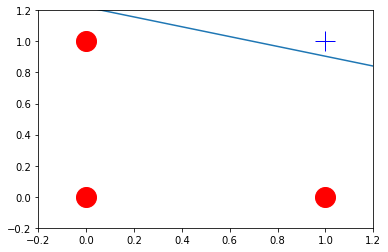

In [22]:
print(and_weight)

plt.plot([0, 0, 1], [0, 1, 0], "ro", markersize=20)
plt.plot([1], [1], "b+", markersize=20)
intercept = threshold/ and_weight[1]
slope = (-and_weight[0]/and_weight[1])



x = [intercept + (slope * x) for x in range(-3, 3)]

plt.plot(x, range(-3, 3))
plt.axis([-0.2, 1.2, -0.2, 1.2])
plt.show()

Here I have marked the positive case (`1 and 1 = 1`) as a plus sign and the negative cases as red dots. If you did everything correctly so far, you should se that the line seperates the plus from the red dots. This is what the perceptron does: it finds a line that seperates two different types of data. Now for the **or** case:

[0.23596574486734845, 0.24034135499194276]


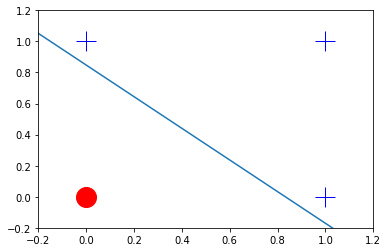

In [23]:
print(or_weight)

plt.plot([0], [0], "ro", markersize=20)
plt.plot([0, 1, 1], [1, 0, 1], "b+", markersize=20)
intercept = threshold/ or_weight[1]
slope = (-or_weight[0]/or_weight[1])

x = [intercept + (slope * x) for x in range(-3, 3)]

plt.plot(x, range(-3, 3))
plt.axis([-0.2, 1.2, -0.2, 1.2])
plt.show()

Here again the + sign are positive cases and the red dot is the negative case. We see that the same perceptron as in the and case has managed to learn a new line that separates the two clases. Let's se why the perceptron is not able to learn the **xor** case!

[0.05614663683658938, 0.16528082857608037]


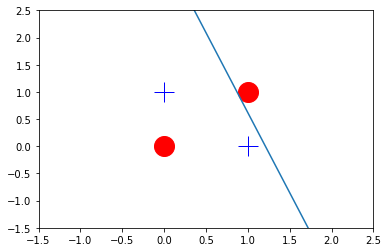

In [24]:
print(xor_weight)

plt.plot([0, 1], [0, 1], "ro", markersize=20)
plt.plot([0, 1], [1, 0], "b+", markersize=20)
intercept = 0.2/ xor_weight[1]
slope = (-xor_weight[0]/ xor_weight[1])

x = [intercept + (slope * x) for x in range(-5, 5)]

plt.plot(x, range(-5, 5))
plt.axis([-1.5, 2.5, -1.5, 2.5])
plt.show()

Hmm, now its apparent that the perceptron, aka. our "line learner", is not able to learn a line that seperates the two clases. If you manage to draw a straight line that solves the xor case, please come show me!

Let's see if we can solve this problem by adding more neurons! 

As you might have noticed I have been sneaking increasingly more and more vectors and matrices into our code. I'm not doing this just to mess with you, but rather to prepare you for the truth: 

We are almost always dealing with matrices and vectors when we work with neural networks. This will not only make your code look better, but we also get more efficient code in the process. We are now going to start playing with conecting multiple perceptrons together and training them with somthing called backpropagation. When we do that I'm going to start using some libraries that help us with the martix stuff, so don't worry.

#### Extra task:
If you have more time, try to run the perceptron one step at a time and plot every iteration, then you can see that the line gets closer and closer to the answer